In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
import sounddevice as sdev

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_36770/1818705841.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_29614/671787503.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


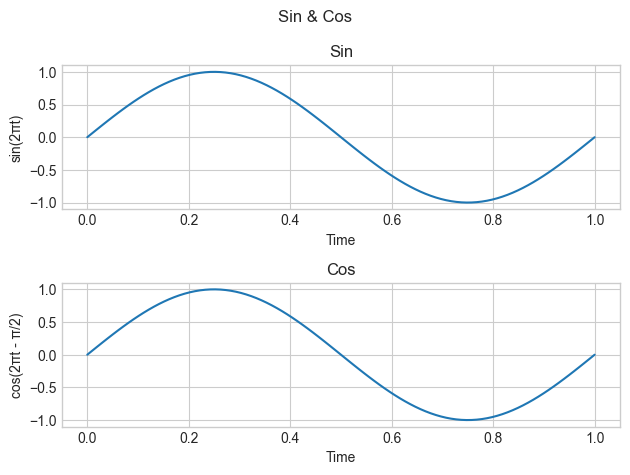

In [6]:
#1

no_samples = 100
time = np.linspace(0, 1, no_samples)

A = 1
f = 1

sin = A * np.sin(2 * np.pi * f * time)
cos = A * np.cos(2 * np.pi * f * time - np.pi / 2)

fig, axs = plt.subplots(2)
fig.suptitle('Sin & Cos')

axs[0].plot(time, sin)
axs[0].set_title('Sin')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('sin(2πt)')


axs[1].plot(time, cos)
axs[1].set_title('Cos')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('cos(2πt - π/2)')

fig.tight_layout()
fig.show()


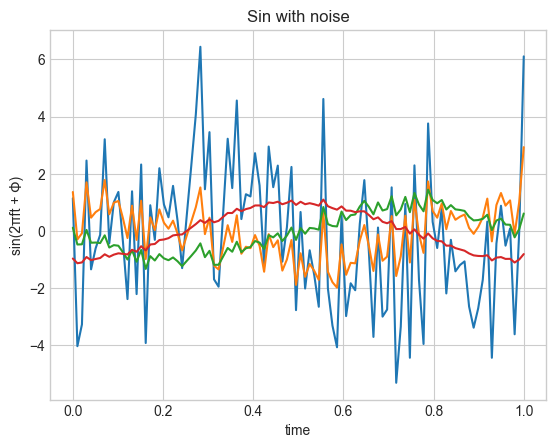

In [82]:
#2

no_samples = 100

time = np.linspace(0, 1, no_samples)

A = 1
f = 1
sin1 = A * np.sin(2 * np.pi * f * time + 0)
sin2 = A * np.sin(2 * np.pi * f * time + np.pi/2)
sin3 = A * np.sin(2 * np.pi * f * time + np.pi)
sin4 = A * np.sin(2 * np.pi * f * time + 3*np.pi/2)

plt.title('Sin with noise')
plt.xlabel('time')
plt.ylabel('sin(2πft + Φ)')

mean, standard_deviation= 0, 1
z = np.random.normal(mean, standard_deviation, no_samples)

def compute_gamma(SNR):
    return np.linalg.norm(sin) / (np.sqrt(SNR) * np.linalg.norm(z))

gamma1 = compute_gamma(0.1)
gamma2 = compute_gamma(1)
gamma3 = compute_gamma(10)
gamma4 = compute_gamma(100)

plt.plot(time, sin1 + gamma1 * z)
plt.plot(time, sin2 + gamma2 * z)
plt.plot(time, sin3 + gamma3 * z)
plt.plot(time, sin4 + gamma4 * z)

In [83]:
#3
def get_singnals_from_last_lab():
    signals = list()

    #2 - a
    fr = 400
    time = np.arange(0, 1, 1/1600)
    signal_a = np.sin(2 * np.pi * time * fr)

    signals.append(signal_a)

    #2 - b
    fr = 800
    time = np.arange(0, 3, 1 / (3 * fr))
    signal_b = np.sin(2 * np.pi * time * fr)

    signals.append(signal_b)

    #2 - c
    fr = 240
    time = np.arange(0, 1, 1 / (2 * fr))
    signal_c = fr * np.mod(time, 1 / fr)    #   sawtooth

    signals.append(signal_c)

    #2 - d
    fr = 300
    time = np.arange(0, 1, 1 / (12 * fr))
    signal_d = np.sign(np.sin(2 * np.pi * time * fr))   #   square

    signals.append(signal_d)

    return signals

signals = get_singnals_from_last_lab()

fs = 10000
for s in signals:
    sdev.play(s, fs)

wav.write('Sawtooth.wav', fs, signals[2])
#   pentru rulare wav din terminal se foloseste comanda afplay!!!

wav.read('Sawtooth.wav', fs)

(10000,
 memmap([0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 5.00000000e-01,
         0.00000000e+00, 5.00000000e-01, 2.08166817e-16, 5.00000000e-01,
         0.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         4.16333634e-16, 5.00000000e-01, 2.08166817e-16, 5.00000000e-01,
         0.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         8.32667268e-16, 5.00000000e-01, 6.24500451e-16, 5.00000000e-01,
         4.16333634e-16, 5.00000000e-01, 2.08166817e-16, 5.00000000e-01,
         0.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
         1.66533454e-15, 5.00000000e-01, 1.45716772e-15, 5.00000000e-01,
         1.24900090e-15, 5.00000000e-01, 1.

AttributeError: 'int' object has no attribute 'set_figheight'

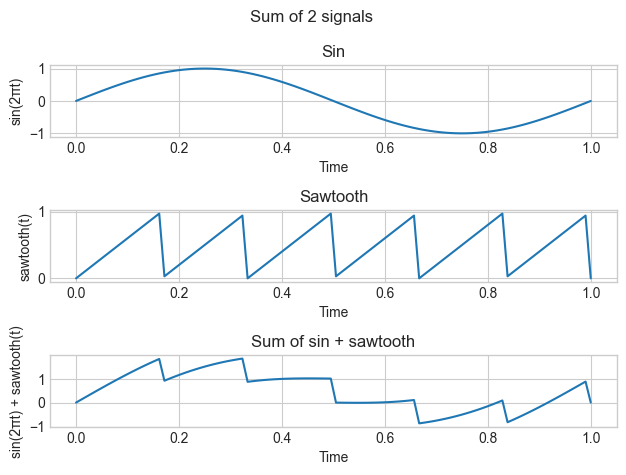

In [16]:
#4

no_samples = 100
time = np.linspace(0, 1, no_samples)

A = 1
f = 1
sin = A * np.sin(2 * np.pi * f * time)

fr = 6
sawtooth = fr * np.mod(time, 1 / fr)    #   sawtooth

fig, axs = plt.subplots(3)

fig.suptitle('Sum of 2 signals')

axs[0].plot(time, sin)
axs[0].set_title('Sin')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('sin(2πt)')


axs[1].plot(time, sawtooth)
axs[1].set_title('Sawtooth')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('sawtooth(t)')

axs[2].plot(time, sin + sawtooth)
axs[2].set_title('Sum of sin + sawtooth')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('sin(2πt) + sawtooth(t)')

fig.tight_layout()
f.set_figheight(10)
fig.show()


In [85]:
#5

no_samples = 10000
time = np.linspace(0, 20, no_samples)

A = 1
f = 1
sin1 = A * np.sin(2 * np.pi * f * time)

f = 5
sin2 = A * np.sin(2 * np.pi * f * time)

sin_concat = np.concatenate([sin1, sin2])

fs = 44100
sdev.play(sin_concat, fs)

Text(0.5, 1.0, '3 sin functions')

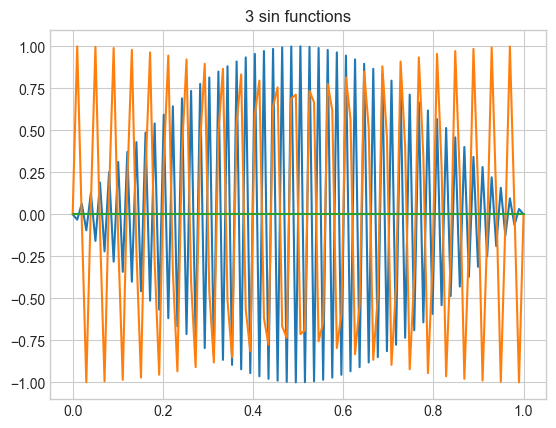

In [86]:
#6

no_samples = 100

#a
time = np.linspace(0, 1, no_samples)

A = 1
f = no_samples / 2
sin = A * np.sin(2 * np.pi * f * time)

plt.plot(time, sin)

#b
time = np.linspace(0, 1, no_samples)

A = 1
f = no_samples / 4
sin = A * np.sin(2 * np.pi * f * time)

plt.plot(time, sin)

#c
#a
time = np.linspace(0, 1, no_samples)

A = 1
f = 0
sin = A * np.sin(2 * np.pi * f * time)

plt.plot(time, sin)
plt.title('3 sin functions')

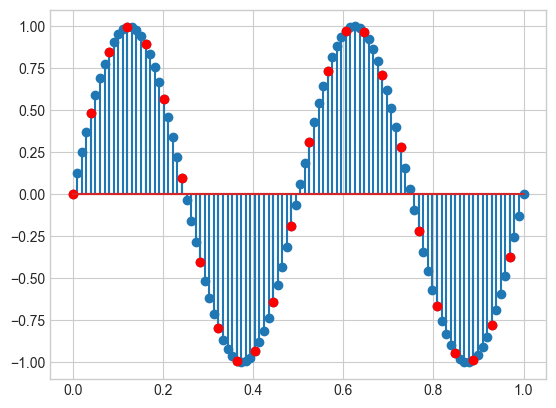

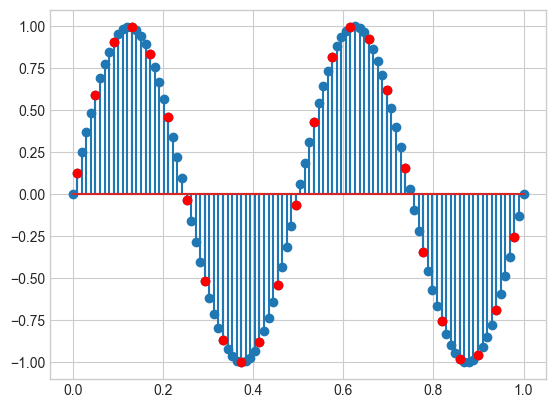

In [79]:
#7

no_samples = 100

time = np.linspace(0, 1, no_samples)

A = 1
f = 2
sin = A * np.sin(2 * np.pi * f * time)

new_sin = sin[0::4]

plt.stem(time, sin)
plt.stem(time[0::4], new_sin, markerfmt='red')
plt.show()

#b

new_sin = sin[1::4]

plt.stem(time, sin)
plt.stem(time[1::4], new_sin, markerfmt='red')
plt.show()



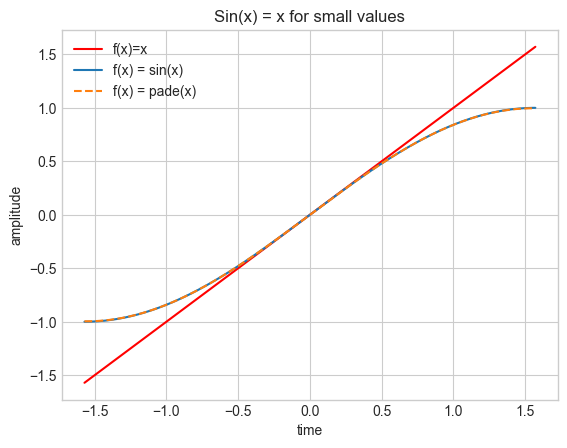

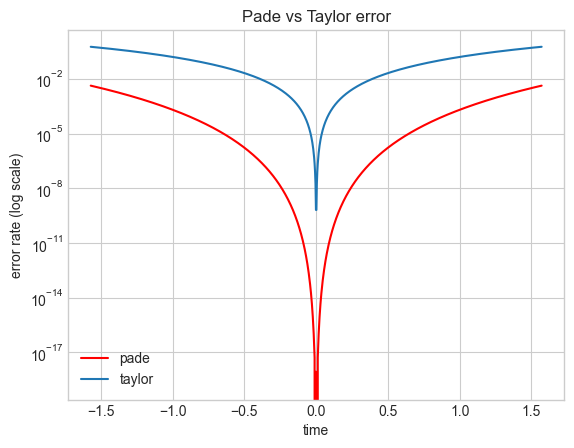

In [96]:
#8

time = np.linspace(-np.pi/2, np.pi/2, 1000)

A = 1
f = 1
sin = A * np.sin(f * time)

pade = (time - (7 * time ** 3) /60) / (1 + time ** 2 / 20)

plt.title('Sin(x) = x for small values')
plt.plot(time, time, color='red', label='f(x)=x')
plt.plot(time, sin, label='f(x) = sin(x)')
plt.plot(time, pade, label='f(x) = pade(x)', linestyle='dashed')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

plt.show()

plt.title('Pade vs Taylor error')
plt.semilogy(time, abs(pade - sin), color='red', label='pade')
plt.semilogy(time, abs(time - sin), label='taylor')
plt.xlabel('time')
plt.ylabel('error rate (log scale)')
plt.legend()
plt.show()